# Enunciado

Faça uma análise de cada dataset antes de mais nada, verificando:
- Características gerais
- Se tem campos nulos

Uma vez feito isso, faça para cada dataset:
- Determinar o número de clusters usando o método do elbow: escrever um texto com o valor em função do que foi exibido no gráfico.
- Treinar o modelo com kmeans:
kmeans = KMeans(n_clusters = ???, init = 'k-means++', n_init = 10, max_iter=300)
testar com init com o parâmetro random e com k-means++, e cada um com 300 iterações e 1000 iterações.
- Lembrar de gerar o cluster de cada instância:
X['cluster'] = pd.DataFrame(y_kmeans)

- Para cada teste, fazer um plot usando a feature x1 para eixo x, e a feature x2 para o eixo y conforme abaixo. Plotar também os centróides.

#%matplotlib notebook
#c color em funcao do cluster
#s size tamanho do ponto
%matplotlib inline
plt.figure(figsize=(16,12))
plt.scatter(X['x1'], X['x2'], s = 10, c = X['cluster'])
plt.scatter(centroids3[:, 0], centroids3[:, 1], s = 100, c = 'red',label = 'Centroids')
plt.title('Dataset features x1 & x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

E finalmente, você com um ótimo cientista de dados, deve pesquisar como validar a eficácia do kmeans ao determinar o cluster de cada instância. Para tal, procure no google exemplos dos seguintes métodos e depois aplique para cada teste feito.

- silhouette_score
- calinski_harabasz_score
- davies_bouldin_score

Com os coeficientes de cada teste avalie (escrever uma justificativa) a eficácia da classificação feita pelo kmeans.

Ordem dos testes: determinar o número de clusters, executar o kmeans, determinar o cluster de cada instância, plotar, verificar a acurácia.
Para dataset 1:
1) random com 300 iterações:
2) random com 1000 iterações
3) kmeans++ com 300 iterações
4) kmeans++ com 1000 iterações

Para dataset 2:
1) random com 300 iterações:
2) random com 1000 iterações
3) kmeans++ com 300 iterações
4) kmeans++ com 1000 iterações

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [2]:
#Impotando dataset 1
df1 = pd.read_csv('Dataset/dataset_1.csv', sep=';')
#Examinando Data Type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18500 entries, 0 to 18499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      18500 non-null  float64
 1   x2      18500 non-null  float64
 2   x3      18500 non-null  float64
 3   x4      18500 non-null  float64
 4   x5      18500 non-null  float64
 5   x6      18500 non-null  float64
 6   x7      18500 non-null  float64
 7   x8      18500 non-null  float64
 8   x9      18500 non-null  float64
 9   x10     18500 non-null  float64
 10  x11     18500 non-null  float64
 11  x12     18500 non-null  float64
dtypes: float64(12)
memory usage: 1.7 MB


In [3]:
#Verificando os primeiros 5 registros
df1.head()

X1        x2        x3        x4        x5        x6        x7  \
0   8.626019  1.947556 -3.650097 -3.554988  5.764661  7.848636  7.860381   
1  -4.298631 -2.479778  5.003003  2.708729  7.249667  0.013919 -8.040928   
2  -8.848742  1.951031  3.624026 -9.739709 -0.078908 -6.745458  1.526731   
3 -10.461907  6.591355  3.683431  6.939596  6.355922 -8.501900 -2.462584   
4   1.310533 -7.091862 -8.056669  4.295828 -9.754949  5.919896  3.796582   

          x8        x9       x10       x11       x12  
0   4.971057  3.125414 -8.346091 -5.397849  7.858297  
1   4.036528  4.039205  2.368104  6.971939  0.087805  
2  -7.796831  2.725701 -3.680006  7.298588 -7.523419  
3 -10.038042  8.493794  2.977859 -3.455197 -8.162983  
4  -8.742766 -9.084667  7.831947 -2.929558 -2.754675

In [4]:
#Verificando valores nulos
df1.isna().sum()

X1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
dtype: int64

In [5]:
#Examinando características gerais do dados
df1.describe()

X1            x2            x3            x4            x5  \
count  18500.000000  18500.000000  18500.000000  18500.000000  18500.000000   
mean       0.479316      0.401101     -0.036613      0.115756     -0.067300   
std        6.162037      5.936852      5.929547      5.288724      6.450516   
min      -12.562877    -12.845130    -13.184632    -12.684910    -13.220067   
25%       -4.163954     -4.969523     -5.410800     -3.845578     -5.982486   
50%        0.246958      2.038327      0.719043      0.942982      0.129550   
75%        6.534062      5.094108      4.827765      4.285728      5.821847   
max       11.706389     12.152035     12.156041     11.984369     12.624881   

                 x6            x7            x8            x9           x10  \
count  18500.000000  18500.000000  18500.000000  18500.000000  18500.000000   
mean      -0.050764     -0.356024      1.258355     -1.014831     -0.419818   
std        5.489512      5.701534      5.882630      6.187764      6.374784   
min      -12.976295    -13.168605    -11.877164    -12.944935    -12.986817   
25%       -4.613177     -5.641036     -4.064888     -6.869708     -6.034305   
50%        0.092994     -0.203821      1.712891     -1.486036     -0.639076   
75%        4.081665      3.813254      6.672852      4.271135      5.006888   
max       12.034950     12.643021     12.347370     12.334277     13.073007   

                x11           x12  
count  18500.000000  18500.000000  
mean      -0.292423     -1.619202  
std        5.910394      5.935993  
min      -12.595942    -12.920032  
25%       -4.583072     -6.524806  
50%       -1.030882     -2.586011  
75%        4.065448      2.599988  
max       12.721117     12.397334

# Definindo o número de Cluster utilizando o método Elbow
## Dataset 1
###  1) random

/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1 7849104.252696779
2 6857344.654385187
3 6201167.255201222
4 5652375.448497529


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 5177785.435140776
6 4784425.1426024055
7 4428196.022357318


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8 4169869.986959825
9 3994062.1092569577
10 3500215.012329231
11 3457498.376884083


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/si

12 3127926.736709766
13 2947254.5617456515
14 2750592.0592261846
15 2508039.3670204547


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


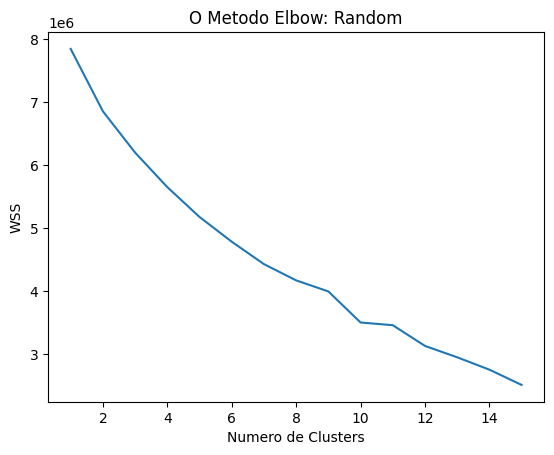

In [6]:
# Estimar o valor de K pode ser um problema.
# tentar encontrar um ponto no grafico onde a variancia dos dados em relacao
# ao numero de cluster, nao eh tao representatica: a queda nao eh tao brusca: este é o
# valor ideal do parametro K.
#%matplotlib notebook
%matplotlib inline

wcss_random = [] # lista vazia que acumula os erros quadraticos

for i in range(1, 16):
    kmeans1_1 = KMeans(n_clusters = i, init = 'random')
    kmeans1_1.fit(df1)
    print (i,kmeans1_1.inertia_)
    wcss_random.append(kmeans1_1.inertia_)

plt.plot(range(1, 16),wcss_random)
plt.title('O Metodo Elbow: Random')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [8]:
display(wcss_random)

[7849104.252696779,
 6857344.654385187,
 6201167.255201222,
 5652375.448497529,
 5177785.435140776,
 4784425.1426024055,
 4428196.022357318,
 4169869.986959825,
 3994062.1092569577,
 3500215.012329231,
 3457498.376884083,
 3127926.736709766,
 2947254.5617456515,
 2750592.0592261846,
 2508039.3670204547]

9 CLUSTERS???

### 2) Kmeans++

/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1 7849104.252696777


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2 6857344.654385187


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3 6217002.8885153895


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4 5635826.658286281


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 5188753.645479522


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


6 4812559.932056846


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7 4454827.1431232365


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8 4172818.504430317


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


9 3875949.6038971944


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


10 3492055.2093293127


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


11 3362519.7441781526


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


12 3024523.9262130037


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


13 2908065.97181216


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


14 2621048.8160212627


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


15 2484277.7081307736


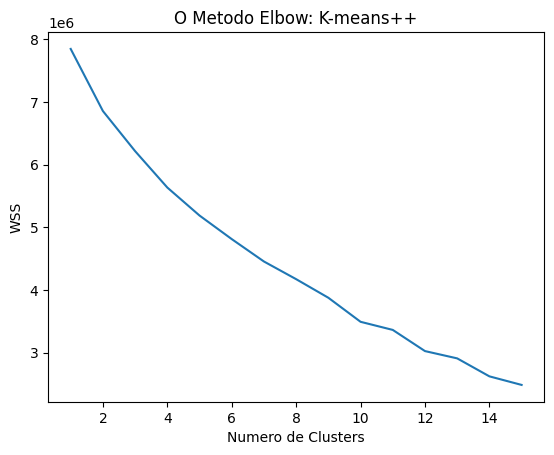

In [9]:
# Estimar o valor de K pode ser um problema.
# tentar encontrar um ponto no grafico onde a variancia dos dados em relacao
# ao numero de cluster, nao eh tao representatica: a queda nao eh tao brusca: este é o
# valor ideal do parametro K.
#%matplotlib notebook
%matplotlib inline

wcss_kmeans = [] # lista vazia que acumula os erros quadraticos

for i in range(1, 16):
    kmeans1_2 = KMeans(n_clusters = i, init = 'k-means++')
    kmeans1_2.fit(df1)
    print (i,kmeans1_2.inertia_)
    wcss_kmeans.append(kmeans1_2.inertia_)

plt.plot(range(1, 16), wcss_kmeans)
plt.title('O Metodo Elbow: K-means++')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [10]:
display(wcss_kmeans)

[7849104.252696777,
 6857344.654385187,
 6217002.8885153895,
 5635826.658286281,
 5188753.645479522,
 4812559.932056846,
 4454827.1431232365,
 4172818.504430317,
 3875949.6038971944,
 3492055.2093293127,
 3362519.7441781526,
 3024523.9262130037,
 2908065.97181216,
 2621048.8160212627,
 2484277.7081307736]

11 CLUSTERS??????

# Instânciando o Algoritmo K-means 
## Dataset 1
### 1) random com 300 iterações

In [12]:
kmeans_r1 = KMeans(n_clusters = 9, init = 'random', n_init = 10, max_iter=300)
kmeans_r1.fit(df1)

KMeans(init='random', n_clusters=9, n_init=10)

In [13]:
kmeans_r1.cluster_centers_

array([[-4.43053589, -4.70206795,  5.97885417,  2.30692013,  1.55067217,
         4.0129011 , -1.83454909,  4.62540336,  1.34872029, -2.77006417,
        -2.80442271, -1.27145988],
       [-0.07377641, -4.76124586, -7.45622743, -5.38915164, -1.61697187,
        -0.03030233, -1.76909647,  1.56244951,  4.99153484, -5.9480743 ,
         1.73443918, -2.08171037],
       [ 6.95227834, -0.77139742, -4.4197516 ,  0.12525475,  6.79404859,
         4.86309484,  5.39814046, -1.3192452 , -0.39670073,  0.88415243,
        -3.41767808,  5.49540994],
       [ 3.44381203,  3.47384871,  4.31565794,  4.26935032,  4.16426175,
        -0.69563238, -5.57962153, -2.07051956, -2.5197571 , -7.91180535,
         3.92166773, -2.5833344 ],
       [-9.51137202,  5.76865858,  4.83637464, -0.42093028,  1.25420047,
        -6.79878643, -2.27873068, -6.4202201 ,  4.01732131,  1.48478397,
         2.86883629, -6.73556399],
       [ 4.7028915 ,  5.33580642, -2.9059688 , -1.15040025, -1.77142249,
        -1.92690683,  

In [14]:
labels = kmeans_r1.labels_

#Armazenando variável cluster no dataframe
df1['Cluster_r1'] = labels
df1.head()

X1        x2        x3        x4        x5        x6        x7  \
0   8.626019  1.947556 -3.650097 -3.554988  5.764661  7.848636  7.860381   
1  -4.298631 -2.479778  5.003003  2.708729  7.249667  0.013919 -8.040928   
2  -8.848742  1.951031  3.624026 -9.739709 -0.078908 -6.745458  1.526731   
3 -10.461907  6.591355  3.683431  6.939596  6.355922 -8.501900 -2.462584   
4   1.310533 -7.091862 -8.056669  4.295828 -9.754949  5.919896  3.796582   

          x8        x9       x10       x11       x12  Cluster_r1  
0   4.971057  3.125414 -8.346091 -5.397849  7.858297           2  
1   4.036528  4.039205  2.368104  6.971939  0.087805           0  
2  -7.796831  2.725701 -3.680006  7.298588 -7.523419           4  
3 -10.038042  8.493794  2.977859 -3.455197 -8.162983           4  
4  -8.742766 -9.084667  7.831947 -2.929558 -2.754675           7

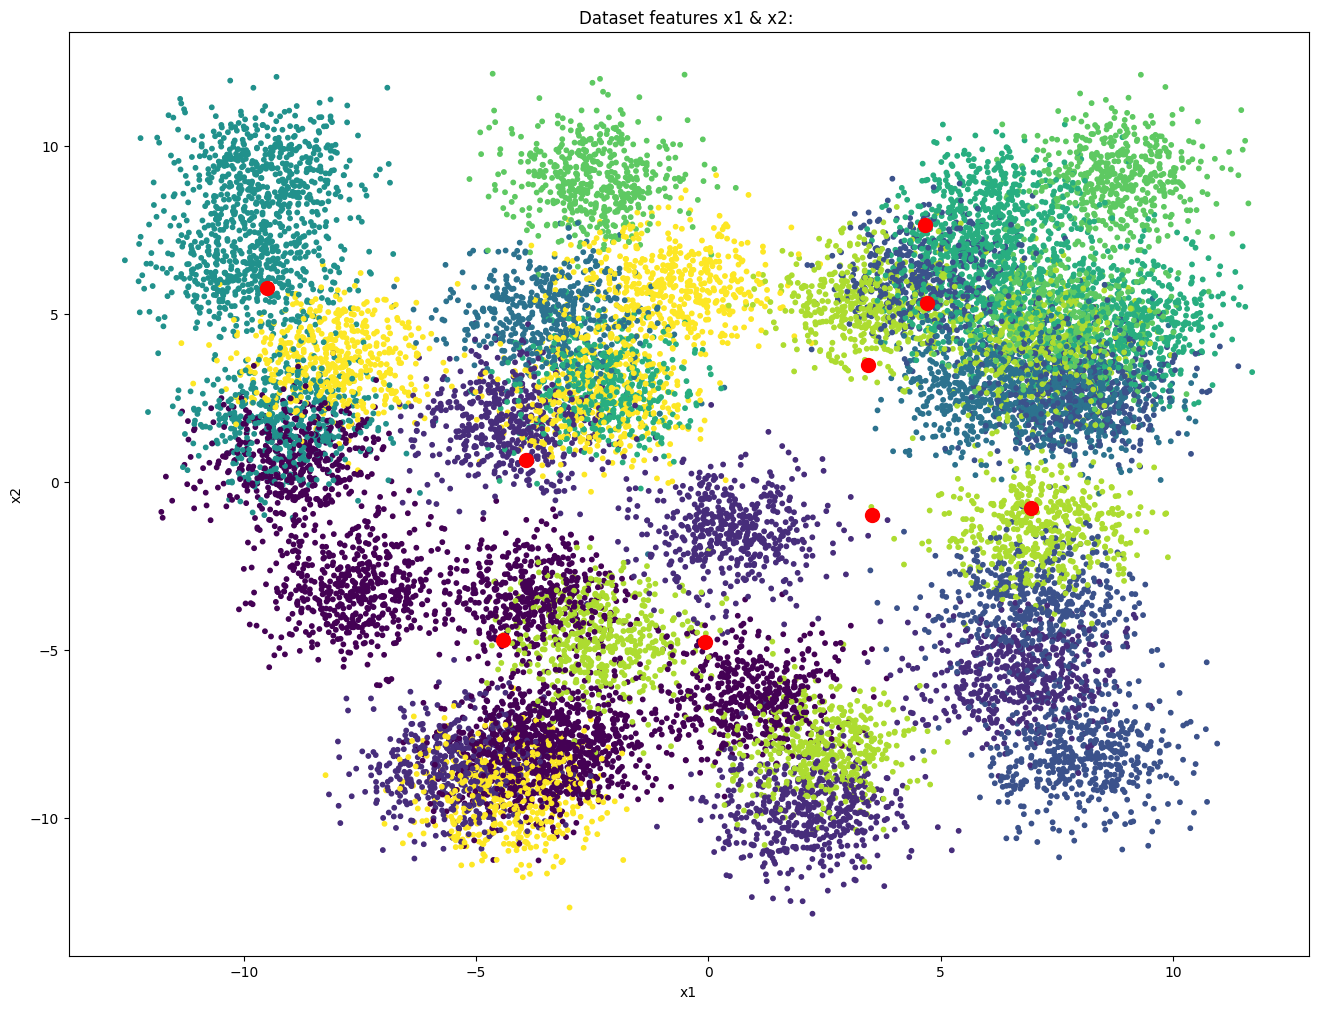

In [16]:
#Plotando Clusters com seus respectivos centróides
#%matplotlib notebook
#c color em funcao do cluster
#s size tamanho do ponto
%matplotlib inline
plt.figure(figsize=(16,12))
plt.scatter(df1['X1'], df1['x2'], s = 10, c = df1['Cluster_r1'])
plt.scatter(kmeans_r1.cluster_centers_[:, 0], kmeans_r1.cluster_centers_[:, 1], s = 100, c = 'red',label = 'Centroids')
plt.title('Dataset features x1 & x2: ')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### validacao da eficácia 


In [24]:
labels = kmeans_r1.labels_
silhouette = silhouette_score(df1, labels)
calinski = calinski_harabasz_score(df1, labels)
davies_bouldin = davies_bouldin_score(df1, labels)

In [25]:
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")

Silhouette Score: 0.2758
Calinski-Harabasz Score: 2482.3093
Davies-Bouldin Score: 1.4820


### 1) random com 1000 iterações

In [17]:
kmeans_r2 = KMeans(n_clusters = 9, init = 'random', n_init = 10, max_iter=1000)
kmeans_r2.fit(df1)

KMeans(init='random', max_iter=1000, n_clusters=9, n_init=10)

In [18]:
kmeans_r2.cluster_centers_

array([[ 3.00437380e+00,  3.40409032e+00,  2.52563177e+00,
         2.35814048e+00,  3.11722788e+00, -1.87819802e+00,
        -6.33022377e+00, -9.25399425e-01, -3.78716599e+00,
        -3.94868814e+00,  4.64983759e+00, -3.08736606e+00,
         4.77955272e+00],
       [-4.68208735e+00, -4.78668898e+00,  4.66492965e+00,
         1.34884127e+00,  4.19938889e+00,  5.04621512e+00,
         1.62079722e-01,  4.51845528e+00,  3.15528430e+00,
        -4.32718584e+00, -8.86164025e-01, -1.19872300e+00,
         1.66889186e-01],
       [-9.51137202e+00,  5.76865858e+00,  4.83637464e+00,
        -4.20930275e-01,  1.25420047e+00, -6.79878643e+00,
        -2.27873068e+00, -6.42022010e+00,  4.01732131e+00,
         1.48478397e+00,  2.86883629e+00, -6.73556399e+00,
         4.00000000e+00],
       [ 5.27774176e+00,  5.45593411e+00,  5.48365780e+00,
         2.08384399e+00, -6.81288868e+00,  1.31500555e+00,
        -1.01372752e+00,  7.37637521e+00,  3.85580339e+00,
         6.81373352e+00, -3.97045777e

In [19]:
labels = kmeans_r2.labels_

#Armazenando variável cluster no dataframe
df1['Cluster_r2'] = labels
df1.head()

X1        x2        x3        x4        x5        x6        x7  \
0   8.626019  1.947556 -3.650097 -3.554988  5.764661  7.848636  7.860381   
1  -4.298631 -2.479778  5.003003  2.708729  7.249667  0.013919 -8.040928   
2  -8.848742  1.951031  3.624026 -9.739709 -0.078908 -6.745458  1.526731   
3 -10.461907  6.591355  3.683431  6.939596  6.355922 -8.501900 -2.462584   
4   1.310533 -7.091862 -8.056669  4.295828 -9.754949  5.919896  3.796582   

          x8        x9       x10       x11       x12  Cluster_r1  Cluster_r2  
0   4.971057  3.125414 -8.346091 -5.397849  7.858297           2           8  
1   4.036528  4.039205  2.368104  6.971939  0.087805           0           1  
2  -7.796831  2.725701 -3.680006  7.298588 -7.523419           4           2  
3 -10.038042  8.493794  2.977859 -3.455197 -8.162983           4           2  
4  -8.742766 -9.084667  7.831947 -2.929558 -2.754675           7           5

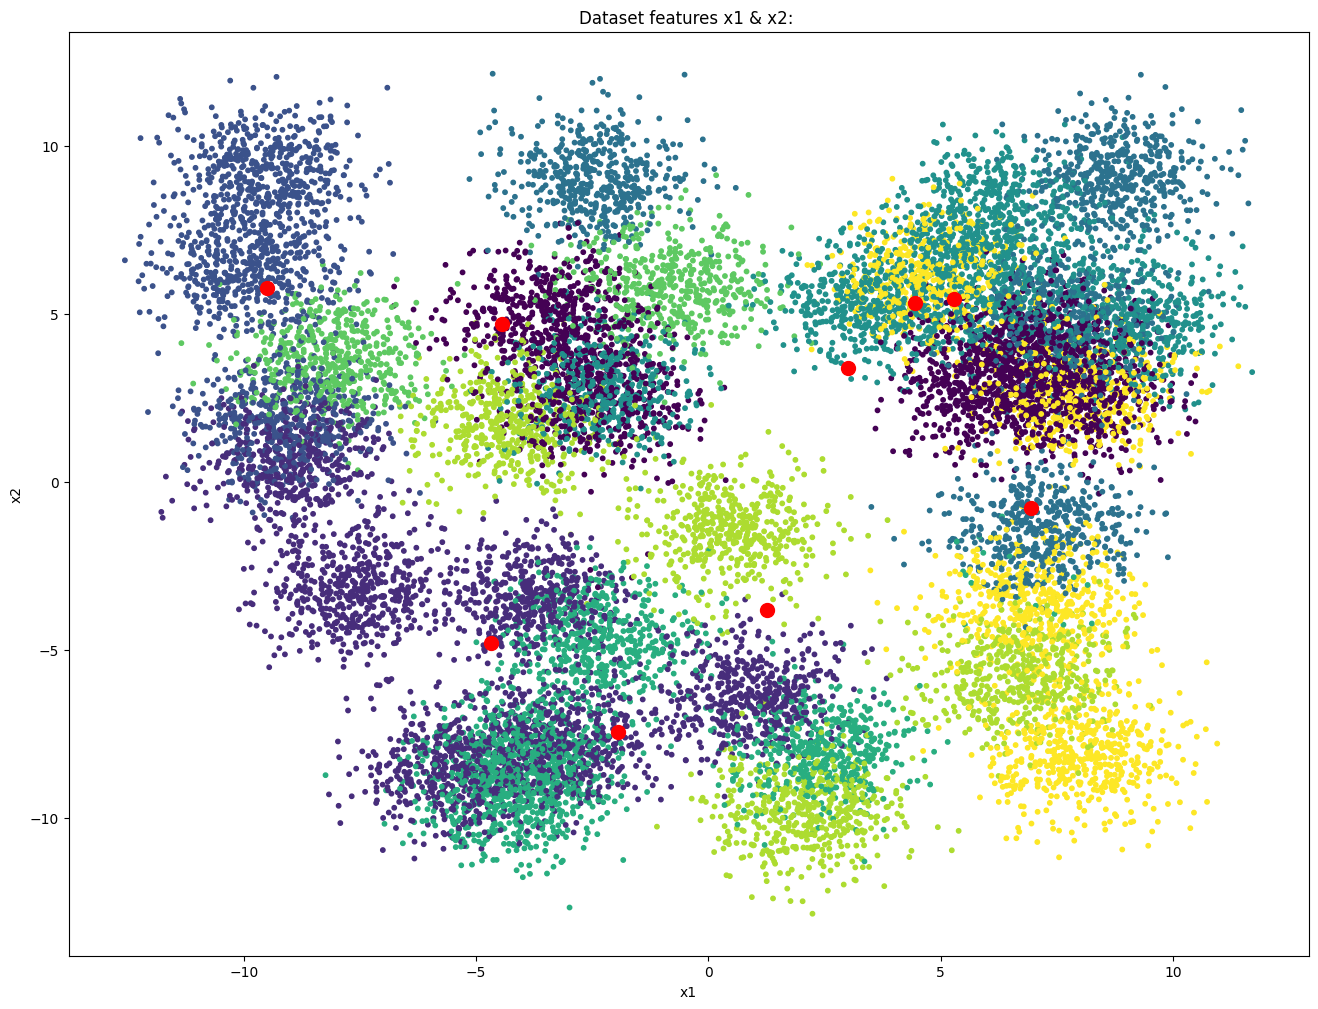

In [20]:
#Plotando Clusters com seus respectivos centróides
#%matplotlib notebook
#c color em funcao do cluster
#s size tamanho do ponto
%matplotlib inline
plt.figure(figsize=(16,12))
plt.scatter(df1['X1'], df1['x2'], s = 10, c = df1['Cluster_r2'])
plt.scatter(kmeans_r2.cluster_centers_[:, 0], kmeans_r2.cluster_centers_[:, 1], s = 100, c = 'red',label = 'Centroids')
plt.title('Dataset features x1 & x2: ')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### validacao da eficácia 

In [26]:
labels = kmeans_r2.labels_
silhouette = silhouette_score(df1, labels)
calinski = calinski_harabasz_score(df1, labels)
davies_bouldin = davies_bouldin_score(df1, labels)

In [27]:
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")

Silhouette Score: 0.2947
Calinski-Harabasz Score: 2582.0883
Davies-Bouldin Score: 1.4128


### 3) k-means++ com 300 iterações

In [32]:
kmeans_k1 = KMeans(n_clusters = 11, init = 'k-means++', n_init = 10, max_iter=300)
kmeans_k1.fit(df1)

KMeans(n_clusters=11, n_init=10)

In [33]:
kmeans_k1.cluster_centers_

array([[ 2.50420759e+00, -3.61196726e-01, -6.43640040e+00,
        -7.85081786e+00, -1.74038201e+00, -9.05230242e-03,
        -4.74410385e+00, -1.17612017e+00,  3.43189976e+00,
        -3.91059287e+00, -2.13938588e-01, -3.74523079e+00,
         2.50000000e+00,  5.25000000e+00],
       [ 6.95227834e+00, -7.71397415e-01, -4.41975160e+00,
         1.25254747e-01,  6.79404859e+00,  4.86309484e+00,
         5.39814046e+00, -1.31924520e+00, -3.96700729e-01,
         8.84152425e-01, -3.41767808e+00,  5.49540994e+00,
         2.00000000e+00,  8.00000000e+00],
       [-6.46000019e+00, -3.63703998e+00,  2.54404083e+00,
        -1.23370561e+00,  5.30000771e+00,  4.77332338e+00,
        -1.85193885e+00,  4.38084585e+00,  6.64666047e+00,
        -3.64908643e+00,  2.99876816e+00, -2.92648714e+00,
         2.51500000e-01,  9.98000000e-01],
       [ 4.45554470e+00,  5.32792434e+00, -3.38039414e+00,
         4.07094317e-03, -1.93703785e+00, -1.00313716e+00,
         2.85713250e+00,  5.82260997e+00, -7.

In [34]:
labels = kmeans_k1.labels_

#Armazenando variável cluster no dataframe
df1['Cluster_k1'] = labels
df1.head()

X1        x2        x3        x4        x5        x6        x7  \
0   8.626019  1.947556 -3.650097 -3.554988  5.764661  7.848636  7.860381   
1  -4.298631 -2.479778  5.003003  2.708729  7.249667  0.013919 -8.040928   
2  -8.848742  1.951031  3.624026 -9.739709 -0.078908 -6.745458  1.526731   
3 -10.461907  6.591355  3.683431  6.939596  6.355922 -8.501900 -2.462584   
4   1.310533 -7.091862 -8.056669  4.295828 -9.754949  5.919896  3.796582   

          x8        x9       x10       x11       x12  Cluster_r1  Cluster_r2  \
0   4.971057  3.125414 -8.346091 -5.397849  7.858297           2           8   
1   4.036528  4.039205  2.368104  6.971939  0.087805           0           1   
2  -7.796831  2.725701 -3.680006  7.298588 -7.523419           4           2   
3 -10.038042  8.493794  2.977859 -3.455197 -8.162983           4           2   
4  -8.742766 -9.084667  7.831947 -2.929558 -2.754675           7           5   

   Cluster_k1  
0           1  
1           2  
2           4  
3           4  
4          10

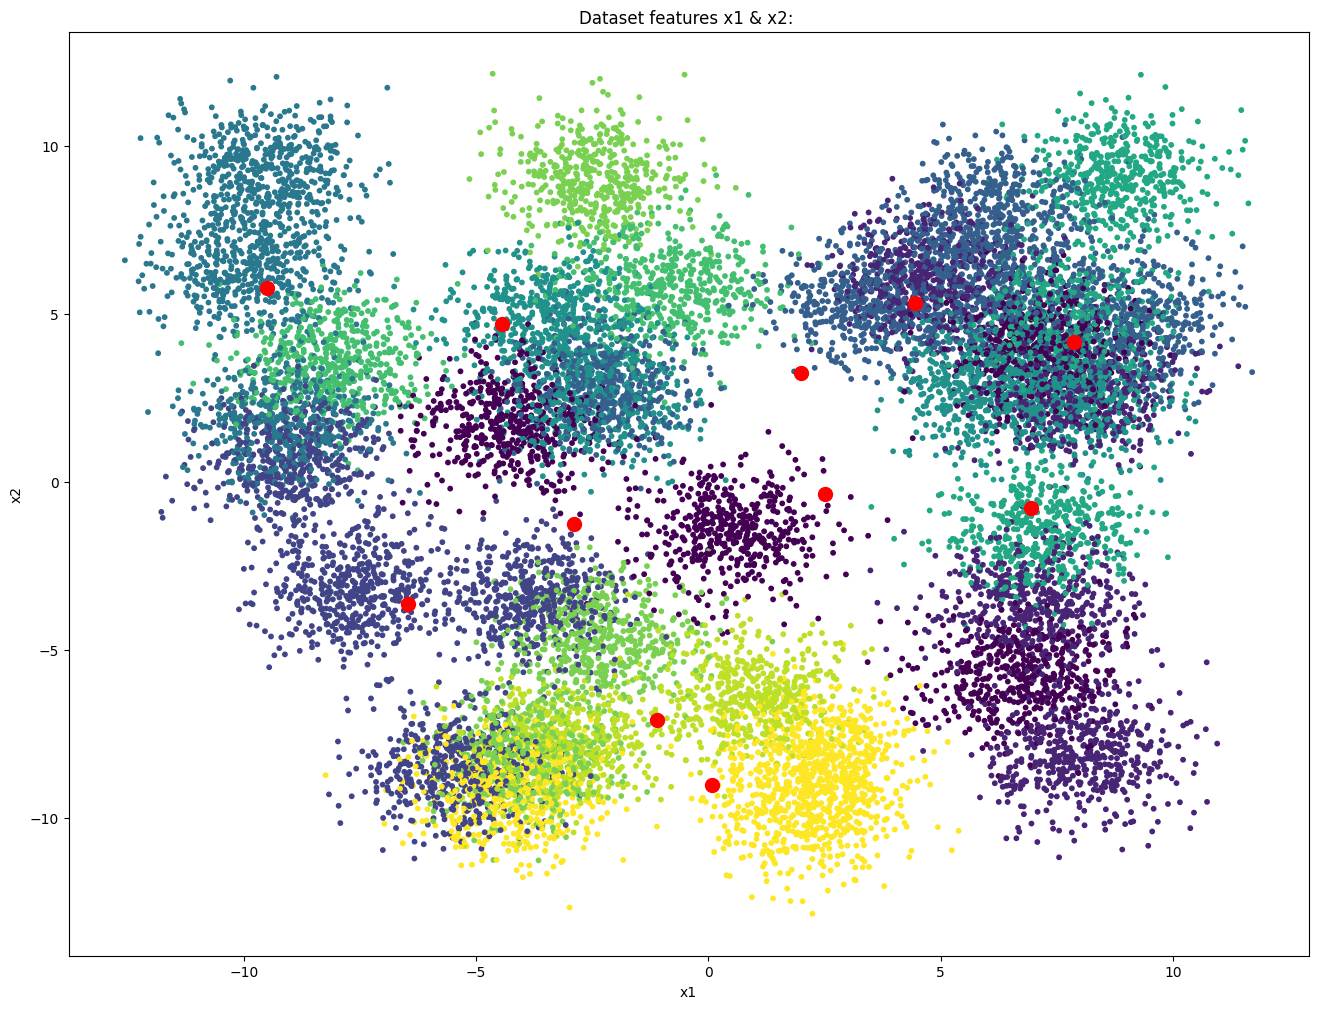

In [35]:
#Plotando Clusters com seus respectivos centróides
#%matplotlib notebook
#c color em funcao do cluster
#s size tamanho do ponto
%matplotlib inline
plt.figure(figsize=(16,12))
plt.scatter(df1['X1'], df1['x2'], s = 10, c = df1['Cluster_k1'])
plt.scatter(kmeans_k1.cluster_centers_[:, 0], kmeans_k1.cluster_centers_[:, 1], s = 100, c = 'red',label = 'Centroids')
plt.title('Dataset features x1 & x2: ')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### validacao da eficácia 

In [37]:
labels = kmeans_k1.labels_
silhouette = silhouette_score(df1, labels)
calinski = calinski_harabasz_score(df1, labels)
davies_bouldin = davies_bouldin_score(df1, labels)

In [38]:
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")

Silhouette Score: 0.3499
Calinski-Harabasz Score: 2831.2162
Davies-Bouldin Score: 1.2706


### 4) k-means++ com 1000 iterações

In [40]:
kmeans_k2 = KMeans(n_clusters = 11, init = 'k-means++', n_init = 10, max_iter=1000)
kmeans_k2.fit(df1)

KMeans(max_iter=1000, n_clusters=11, n_init=10)

In [41]:
kmeans_k2.cluster_centers_ 

array([[ 3.47810684e+00, -4.61011136e-02,  5.51820300e+00,
         4.72817854e-01, -6.47355576e+00,  2.61761242e+00,
        -2.35175850e+00,  7.26329593e+00, -6.03853948e-02,
         7.23423551e+00, -8.70793320e-01, -3.53220712e+00,
         5.22800000e+00,  3.81760000e+00,  6.80000000e+00],
       [-6.46000019e+00, -3.63703998e+00,  2.54404083e+00,
        -1.23370561e+00,  5.30000771e+00,  4.77332338e+00,
        -1.85193885e+00,  4.38084585e+00,  6.64666047e+00,
        -3.64908643e+00,  2.99876816e+00, -2.92648714e+00,
         2.51500000e-01,  9.98000000e-01,  2.00000000e+00],
       [ 6.95227834e+00, -7.71397415e-01, -4.41975160e+00,
         1.25254747e-01,  6.79404859e+00,  4.86309484e+00,
         5.39814046e+00, -1.31924520e+00, -3.96700729e-01,
         8.84152425e-01, -3.41767808e+00,  5.49540994e+00,
         2.00000000e+00,  8.00000000e+00,  1.00000000e+00],
       [ 1.98862579e+00,  3.25522804e+00,  3.28233057e+00,
         4.95187996e+00,  3.93508339e+00, -2.20094227

In [42]:
labels = kmeans_k2.labels_

#Armazenando variável cluster no dataframe
df1['Cluster_k2'] = labels
df1.head()

X1        x2        x3        x4        x5        x6        x7  \
0   8.626019  1.947556 -3.650097 -3.554988  5.764661  7.848636  7.860381   
1  -4.298631 -2.479778  5.003003  2.708729  7.249667  0.013919 -8.040928   
2  -8.848742  1.951031  3.624026 -9.739709 -0.078908 -6.745458  1.526731   
3 -10.461907  6.591355  3.683431  6.939596  6.355922 -8.501900 -2.462584   
4   1.310533 -7.091862 -8.056669  4.295828 -9.754949  5.919896  3.796582   

          x8        x9       x10       x11       x12  Cluster_r1  Cluster_r2  \
0   4.971057  3.125414 -8.346091 -5.397849  7.858297           2           8   
1   4.036528  4.039205  2.368104  6.971939  0.087805           0           1   
2  -7.796831  2.725701 -3.680006  7.298588 -7.523419           4           2   
3 -10.038042  8.493794  2.977859 -3.455197 -8.162983           4           2   
4  -8.742766 -9.084667  7.831947 -2.929558 -2.754675           7           5   

   Cluster_k1  Cluster_k2  
0           1           2  
1           2           1  
2           4           6  
3           4           6  
4          10           7

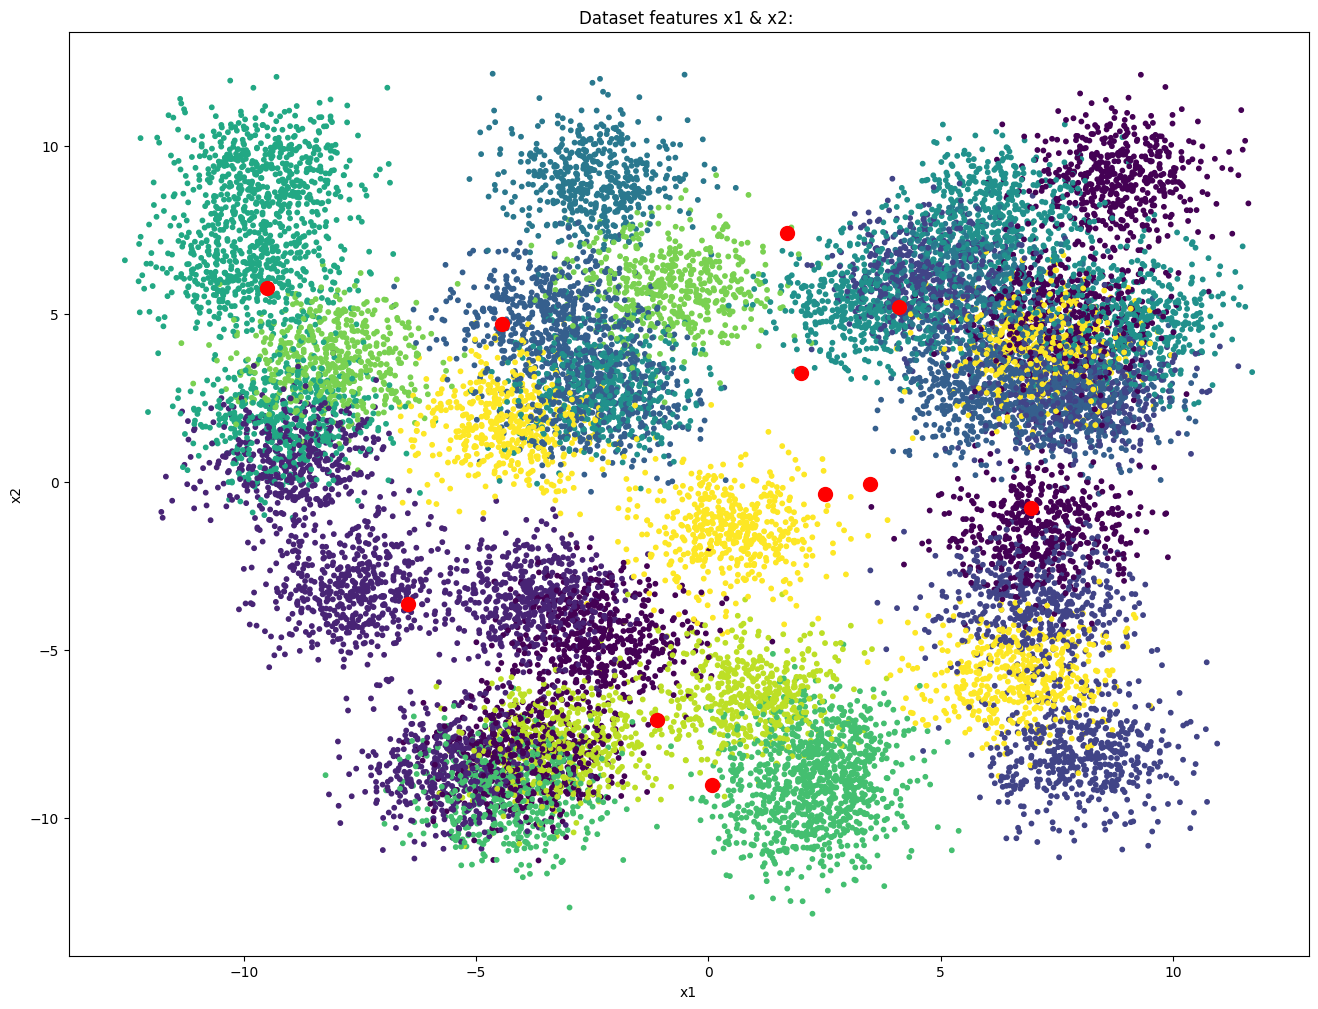

In [44]:
#Plotando Clusters com seus respectivos centróides
#%matplotlib notebook
#c color em funcao do cluster
#s size tamanho do ponto
%matplotlib inline
plt.figure(figsize=(16,12))
plt.scatter(df1['X1'], df1['x2'], s = 10, c = df1['Cluster_k2'])
plt.scatter(kmeans_k2.cluster_centers_[:, 0], kmeans_k2.cluster_centers_[:, 1], s = 100, c = 'red',label = 'Centroids')
plt.title('Dataset features x1 & x2: ')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

validacao da eficácia



In [45]:
labels = kmeans_k2.labels_
silhouette = silhouette_score(df1, labels)
calinski = calinski_harabasz_score(df1, labels)
davies_bouldin = davies_bouldin_score(df1, labels)

In [46]:
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")

Silhouette Score: 0.3508
Calinski-Harabasz Score: 2828.9828
Davies-Bouldin Score: 1.2470


## Dataset 2

In [47]:
#Impotando dataset 1
df2 = pd.read_csv('Dataset/dataset_2.csv', sep=';')
#Examinando Data Type
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108500 entries, 0 to 108499
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x1      108500 non-null  float64
 1   x2      108500 non-null  float64
 2   x3      108500 non-null  float64
 3   x4      108500 non-null  float64
 4   x5      108500 non-null  float64
 5   x6      108500 non-null  float64
 6   x7      108500 non-null  float64
 7   x8      108500 non-null  float64
 8   x9      108500 non-null  float64
 9   x10     108500 non-null  float64
 10  x11     108500 non-null  float64
 11  x12     108500 non-null  float64
dtypes: float64(12)
memory usage: 9.9 MB


In [49]:
#Verificando os primeiros 5 registros
df2.head()

x1        x2        x3        x4        x5        x6        x7  \
0  -8.089047 -5.818536  3.866754  5.775059  7.702591 -1.376691  3.594013   
1 -10.737993 -8.971126 -2.103010  7.880418 -4.338573 -0.496815 -9.312761   
2   8.311043  1.395897 -6.382220  3.684960  1.968494 -2.890885 -7.668416   
3   4.932782  8.649455 -5.623264 -8.834867 -8.274160  2.383717  0.378244   
4   0.599589 -1.254499 -0.607769 -1.517817  4.233317  1.485544  6.871345   

         x8        x9       x10        x11       x12  
0 -6.808177 -4.180117  8.452810 -11.485139 -8.536097  
1 -6.737319  8.985369  9.982048  -9.468952  8.021616  
2  2.931867  0.569600  7.415585   0.332117  7.068037  
3  1.636102 -5.473114 -1.293068   0.994760 -0.684647  
4 -0.679799  0.869733  2.941368   0.274214  6.025676

In [50]:
#Verificando dados nulos
df2.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
dtype: int64

In [51]:
#Examinando características gerais do dados
df1.describe()

X1            x2            x3            x4            x5  \
count  18500.000000  18500.000000  18500.000000  18500.000000  18500.000000   
mean       0.479316      0.401101     -0.036613      0.115756     -0.067300   
std        6.162037      5.936852      5.929547      5.288724      6.450516   
min      -12.562877    -12.845130    -13.184632    -12.684910    -13.220067   
25%       -4.163954     -4.969523     -5.410800     -3.845578     -5.982486   
50%        0.246958      2.038327      0.719043      0.942982      0.129550   
75%        6.534062      5.094108      4.827765      4.285728      5.821847   
max       11.706389     12.152035     12.156041     11.984369     12.624881   

                 x6            x7            x8            x9           x10  \
count  18500.000000  18500.000000  18500.000000  18500.000000  18500.000000   
mean      -0.050764     -0.356024      1.258355     -1.014831     -0.419818   
std        5.489512      5.701534      5.882630      6.187764      6.374784   
min      -12.976295    -13.168605    -11.877164    -12.944935    -12.986817   
25%       -4.613177     -5.641036     -4.064888     -6.869708     -6.034305   
50%        0.092994     -0.203821      1.712891     -1.486036     -0.639076   
75%        4.081665      3.813254      6.672852      4.271135      5.006888   
max       12.034950     12.643021     12.347370     12.334277     13.073007   

                x11           x12    Cluster_r1    Cluster_r2    Cluster_k1  \
count  18500.000000  18500.000000  18500.000000  18500.000000  18500.000000   
mean      -0.292423     -1.619202      3.758811      3.677838      4.405405   
std        5.910394      5.935993      2.763091      2.641814      3.097244   
min      -12.595942    -12.920032      0.000000      0.000000      0.000000   
25%       -4.583072     -6.524806      1.000000      1.000000      2.000000   
50%       -1.030882     -2.586011      4.000000      4.000000      4.000000   
75%        4.065448      2.599988      6.000000      6.000000      7.000000   
max       12.721117     12.397334      8.000000      8.000000     10.000000   

         Cluster_k2  
count  18500.000000  
mean       4.459459  
std        3.276496  
min        0.000000  
25%        2.000000  
50%        4.000000  
75%        7.000000  
max       10.000000

# Definindo o número de Cluster utilizando o método Elbow
## Dataset 2
###  1) random

In [52]:
# Estimar o valor de K pode ser um problema.
# tentar encontrar um ponto no grafico onde a variancia dos dados em relacao
# ao numero de cluster, nao eh tao representatica: a queda nao eh tao brusca: este é o
# valor ideal do parametro K.
#%matplotlib notebook
%matplotlib inline

wcss2 = [] # lista vazia que acumula os erros quadraticos

for i in range(1, 10):
    kmeans2_2 = KMeans(n_clusters = i, init = 'random')
    kmeans2_2.fit(df2)
    print (i,kmeans2_2.inertia_)
    wcss2.append(kmeans2_2.inertia_)

plt.plot(range(1, 10), wcss2)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1 45193158.9737913
2 41721614.28975671


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3 39247289.8856594


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4 37217519.86007324


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 35467581.14062099


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


6 34116004.9881966


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7 32824881.84612613


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8 31805559.510036718


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


9 31009517.65245151


In [53]:
wcss2

[45193158.9737913,
 41721614.28975671,
 39247289.8856594,
 37217519.86007324,
 35467581.14062099,
 34116004.9881966,
 32824881.84612613,
 31805559.510036718,
 31009517.65245151]

## 2)Kmeans++

/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1 45193158.97379131


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2 41721319.25607379


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3 39263348.73239031


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4 37283117.652805015


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 35468271.42907077


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


6 34131371.461132646


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7 32901561.211007036


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8 31894563.926829323


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


9 30900778.152261782


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


10 30089138.988459393


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


11 29350081.803960793


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


12 28657685.196426693


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


13 28012569.30950487


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


14 27318648.800411027


/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


15 26753460.59928559


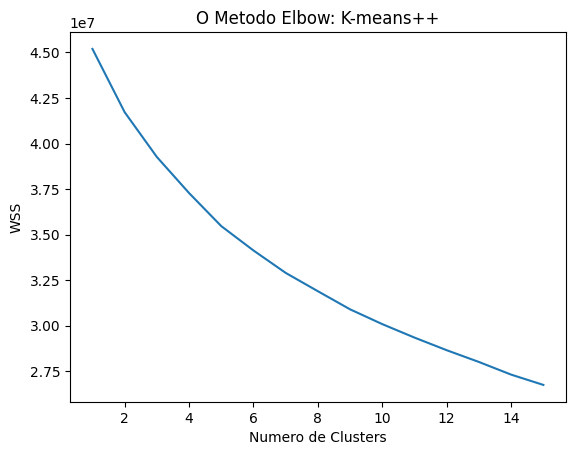

In [54]:
# Estimar o valor de K pode ser um problema.
# tentar encontrar um ponto no grafico onde a variancia dos dados em relacao
# ao numero de cluster, nao eh tao representatica: a queda nao eh tao brusca: este é o
# valor ideal do parametro K.
#%matplotlib notebook
%matplotlib inline

wcss_22 = [] # lista vazia que acumula os erros quadraticos

for i in range(1, 16):
    kmeans2_2 = KMeans(n_clusters = i, init = 'k-means++')
    kmeans2_2.fit(df2)
    print (i,kmeans2_2.inertia_)
    wcss_22.append(kmeans2_2.inertia_)

plt.plot(range(1, 16), wcss_22)
plt.title('O Metodo Elbow: K-means++')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [55]:
wcss_22

[45193158.97379131,
 41721319.25607379,
 39263348.73239031,
 37283117.652805015,
 35468271.42907077,
 34131371.461132646,
 32901561.211007036,
 31894563.926829323,
 30900778.152261782,
 30089138.988459393,
 29350081.803960793,
 28657685.196426693,
 28012569.30950487,
 27318648.800411027,
 26753460.59928559]

# Instânciando o Algoritmo K-means 
## Dataset 2
### 1) random com 300 iterações

In [57]:
kmeans_r21 = KMeans(n_clusters = 11, init = 'k-means++', n_init = 10, max_iter=300)
kmeans_r21.fit(df2)

KMeans(n_clusters=11, n_init=10)

In [58]:
labels = kmeans_r21.labels_

#Armazenando variável cluster no dataframe
df2['Cluster_r21'] = labels
df2.head()

x1        x2        x3        x4        x5        x6        x7  \
0  -8.089047 -5.818536  3.866754  5.775059  7.702591 -1.376691  3.594013   
1 -10.737993 -8.971126 -2.103010  7.880418 -4.338573 -0.496815 -9.312761   
2   8.311043  1.395897 -6.382220  3.684960  1.968494 -2.890885 -7.668416   
3   4.932782  8.649455 -5.623264 -8.834867 -8.274160  2.383717  0.378244   
4   0.599589 -1.254499 -0.607769 -1.517817  4.233317  1.485544  6.871345   

         x8        x9       x10        x11       x12  Cluster_r21  
0 -6.808177 -4.180117  8.452810 -11.485139 -8.536097           10  
1 -6.737319  8.985369  9.982048  -9.468952  8.021616            0  
2  2.931867  0.569600  7.415585   0.332117  7.068037            6  
3  1.636102 -5.473114 -1.293068   0.994760 -0.684647            5  
4 -0.679799  0.869733  2.941368   0.274214  6.025676            8

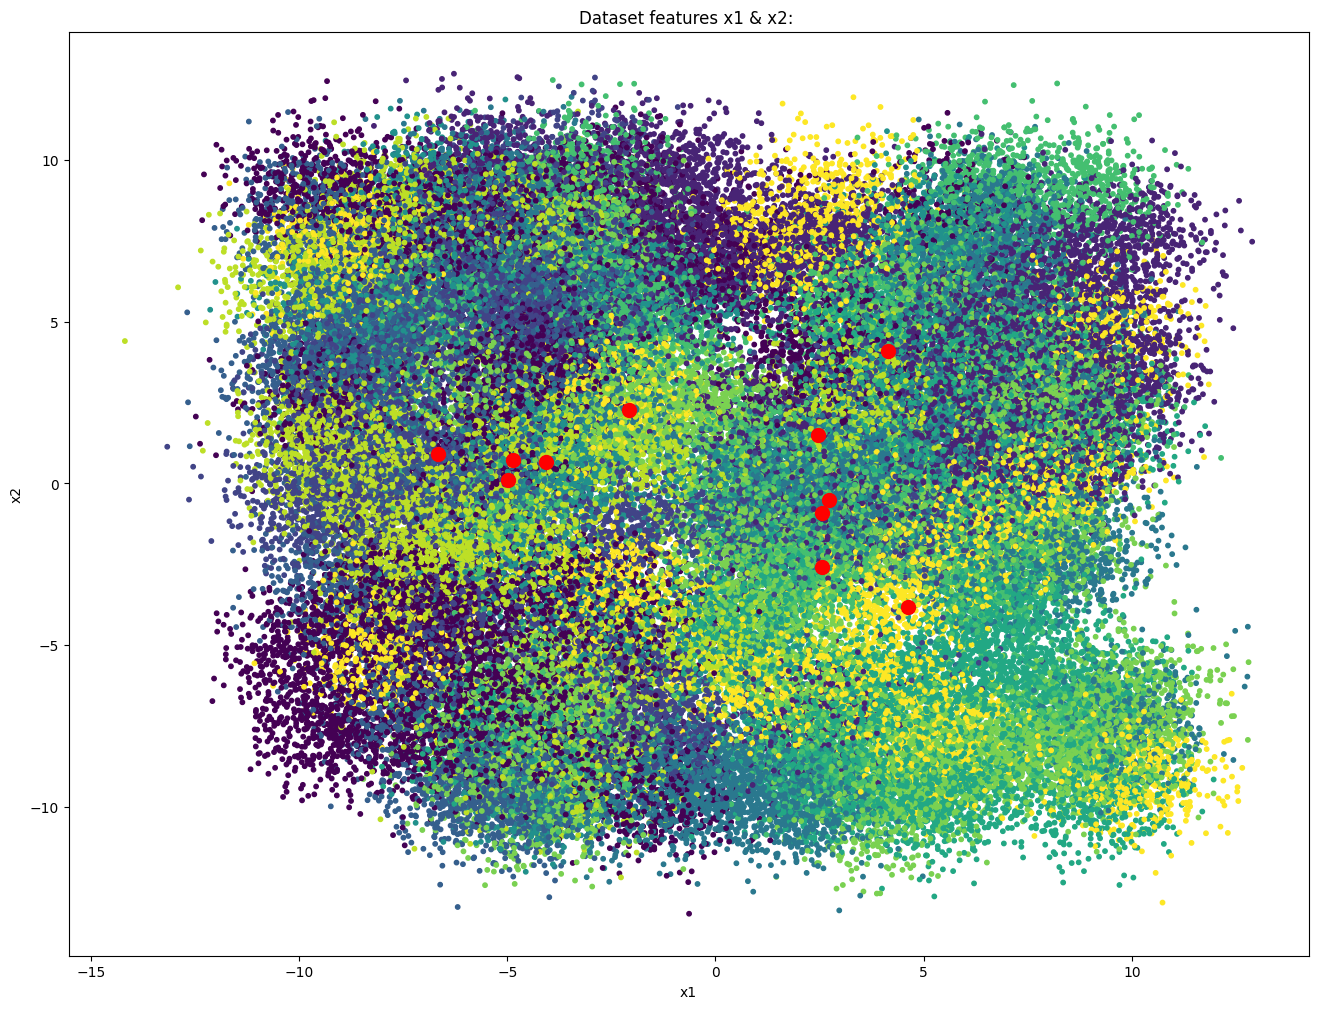

In [60]:
#Plotando Clusters com seus respectivos centróides
#%matplotlib notebook
#c color em funcao do cluster
#s size tamanho do ponto
%matplotlib inline
plt.figure(figsize=(16,12))
plt.scatter(df2['x1'], df2['x2'], s = 10, c = df2['Cluster_r21'])
plt.scatter(kmeans_r21.cluster_centers_[:, 0], kmeans_r21.cluster_centers_[:, 1], s = 100, c = 'red',label = 'Centroids')
plt.title('Dataset features x1 & x2: ')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### validacao da eficácia 

In [ ]:
labels = kmeans_r21.labels_
silhouette = silhouette_score(df2, labels)
calinski = calinski_harabasz_score(df2, labels)
davies_bouldin = davies_bouldin_score(df2, labels)

In [ ]:
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")

### 2) random com 1000 iterações

In [ ]:
kmeans_r22 = KMeans(n_clusters = 11, init = 'k-means++', n_init = 10, max_iter=1000)
kmeans_r22.fit(df2)

In [ ]:
labels = kmeans_r22.labels_

#Armazenando variável cluster no dataframe
df2['Cluster_r22'] = labels
df2.head()

In [ ]:
#Plotando Clusters com seus respectivos centróides
#%matplotlib notebook
#c color em funcao do cluster
#s size tamanho do ponto
%matplotlib inline
plt.figure(figsize=(16,12))
plt.scatter(df2['x1'], df2['x2'], s = 10, c = df2['Cluster_r22'])
plt.scatter(kmeans_r22.cluster_centers_[:, 0], kmeans_r22.cluster_centers_[:, 1], s = 100, c = 'red',label = 'Centroids')
plt.title('Dataset features x1 & x2: ')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### validacao da eficácia 

In [ ]:
labels = kmeans_r22.labels_
silhouette = silhouette_score(df2, labels)
calinski = calinski_harabasz_score(df2, labels)
davies_bouldin = davies_bouldin_score(df2, labels)

In [ ]:
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")

### 3) k-means++ com 300 iterações

In [ ]:
kmeans_k21 = KMeans(n_clusters = 11, init = 'k-means++', n_init = 10, max_iter=300)
kmeans_k21.fit(df2)

In [ ]:
labels = kmeans_k21.labels_

#Armazenando variável cluster no dataframe
df2['Cluster_k21'] = labels
df2.head()

In [ ]:
#Plotando Clusters com seus respectivos centróides
#%matplotlib notebook
#c color em funcao do cluster
#s size tamanho do ponto
%matplotlib inline
plt.figure(figsize=(16,12))
plt.scatter(df2['x1'], df2['x2'], s = 10, c = df2['Cluster_k21'])
plt.scatter(kmeans_k21.cluster_centers_[:, 0], kmeans_k21.cluster_centers_[:, 1], s = 100, c = 'red',label = 'Centroids')
plt.title('Dataset features x1 & x2: ')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### validacao da eficácia 

In [ ]:
labels = kmeans_k21.labels_
silhouette = silhouette_score(df2, labels)
calinski = calinski_harabasz_score(df2, labels)
davies_bouldin = davies_bouldin_score(df2, labels)

In [ ]:
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")

### 4) k-means++ com 1000 iterações

In [ ]:
kmeans_k22 = KMeans(n_clusters = 11, init = 'k-means++', n_init = 10, max_iter=1000)
kmeans_k22.fit(df2)

In [ ]:
labels = kmeans_k22.labels_

#Armazenando variável cluster no dataframe
df2['Cluster_k22'] = labels
df2.head()

In [ ]:
#Plotando Clusters com seus respectivos centróides
#%matplotlib notebook
#c color em funcao do cluster
#s size tamanho do ponto
%matplotlib inline
plt.figure(figsize=(16,12))
plt.scatter(df2['x1'], df2['x2'], s = 10, c = df2['Cluster_k22'])
plt.scatter(kmeans_k22.cluster_centers_[:, 0], kmeans_k22.cluster_centers_[:, 1], s = 100, c = 'red',label = 'Centroids')
plt.title('Dataset features x1 & x2: ')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### validacao da eficácia 

In [ ]:
labels = kmeans_k22.labels_
silhouette = silhouette_score(df2, labels)
calinski = calinski_harabasz_score(df2, labels)
davies_bouldin = davies_bouldin_score(df2, labels)

In [ ]:
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")